#**BÁO CÁO ĐỀ TÀI KHÓA HỌC AI ADVENTURE**









**Ý tưởng và mục tiêu**
- CHD (Coronary Heart Disease), hay bệnh mạch vành, là một tình trạng xảy ra khi các mạch máu cung cấp máu cho tim (động mạch vành) bị hẹp hoặc tắc nghẽn.
- Nguyên nhân gây nên chủ yếu là do sự tích tụ của mảng bám trong động mạch vành, bao gồm chất béo, cholesterol, canxi,.... Các yếu tố nguy cơ góp phần bao gồm hút thuốc, cao huyết áp, tiểu đường, cholesterol cao, béo phì, lối sống ít vận động, và tiền sử gia đình có bệnh tim mạch
- Vì vậy Nhóm hướng tới mục tiêu xây dựng mô hình phân tích và chẩn đoán nguy cơmắc bệnh CHD trong tương lai dựa trên chỉ số sức khỏe của mỗi cá nhân.
- Dữ liệu huấn luyện là một thống kê tim mạch bao gồm các thông số sinh học và thói quen sinh hoạt của hơn 4000 cá thể cư dân của thị trấn Framingham, Massachusetts.


**Tóm tắt nội dung**    
        

1.   [Khai báo thư viện và tải dữ liệu](https://colab.research.google.com/drive/1Dmvuvsh-XwLW6PEhQw-2I0MhQ6dzHfE4#scrollTo=s6z5mvnmqCTH)
2.   [Tổng quan về dữ liệu](https://colab.research.google.com/drive/1Dmvuvsh-XwLW6PEhQw-2I0MhQ6dzHfE4#scrollTo=wwpIzVvFqCTM)
3.   [Trực quan hóa dữ liệu](https://colab.research.google.com/drive/1Dmvuvsh-XwLW6PEhQw-2I0MhQ6dzHfE4#scrollTo=kMw0AJu_qCTU)
4.   [Tiền xử lý dữ liệu](https://colab.research.google.com/drive/1Dmvuvsh-XwLW6PEhQw-2I0MhQ6dzHfE4#scrollTo=HO5aW_F9qCTW)
5.   [Áp dụng các mô hình học máy](https://colab.research.google.com/drive/1Dmvuvsh-XwLW6PEhQw-2I0MhQ6dzHfE4#scrollTo=p_1xd-vxhe7I)


#Khai báo thư viện và tải dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("framingham.csv")

#Tổng quan về dữ liệu

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


* **male:** 1 [Nam] , 0 [Nữ]
* **age:** Tuổi của bệnh nhân
* **education:** Trình độ giáo dục (4 [PhD] , 3 [Master], 2 [Bachelor], 1 [High school])
* **curentSmoker:** Hiện có đang hút thuốc hay không (1 [Có] , 0 [Không])
* **cigsPerDay:** Lượng thuốc lá hút 1 ngày
* **BPMeds:** Tiền sử bị bệnh huyết áp (1 [Có], 0 [Không])
* **prevalentStroke:** Tiền sử bị đột quỵ (1 [Có] , 0 [Không])
* **prevalentHyp:** Tiền sử tăng huyết áp (1 [Có] , 0 [Không])
* **diabetes:** Bệnh tiểu đường (1 [Có] , 0 [Không])
* **totChol:** Chỉ số mỡ máu
* **sysBP:** Huyết áp tâm thu
* **diaBP:** Huyết áp tâm trương
* **BMI:** Chỉ số BMI
* **heartRate:** Nhịp tim
* **glucose :** Lượng đường trong máu
* **TenYearCHD :** 1 [Có] , 0 [Không]

In [4]:
print(f"Kích thước của dữ liệu: {df.shape}")
print(f"Info của dataset :\n")
print(df.info())

Kích thước của dữ liệu: (4240, 16)
Info của dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: fl

In [5]:
print(f"Các thông số đặc trưng :")
round(df.describe().T,ndigits=2)

Các thông số đặc trưng :


,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.43,0.50,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.01,11.92,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.70,44.59,107.00,206.00,234.0,263.00,696.0


In [6]:
df.isna().sum().to_frame().T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0,105,0,29,53,0,0,0,50,0,0,19,1,388,0


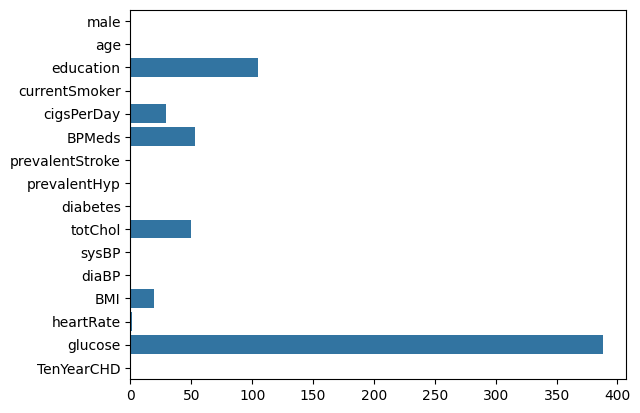

In [7]:
sns.barplot(df.isna().sum(),orient="h")
plt.show()

Có hơn 600 ô dữ liệu bị để trống trong đó 'glucose' là đặc trưng có nhiều điểm bị thiếu nhất

In [8]:
dup = df[df.duplicated()].shape[0]
print(f"Có tổng cộng {dup} lặp dữ liệu lặp")

df.drop_duplicates(keep='first',inplace=True)
print(f"Kích thước dữ liệu sau khi loại bỏ duplicate: {df.shape[0]}")

Có tổng cộng 0 lặp dữ liệu lặp
Kích thước dữ liệu sau khi loại bỏ duplicate: 4240


#Trực quan hóa dữ liệu




**Biểu đồ phân phối (Tổng quan)**

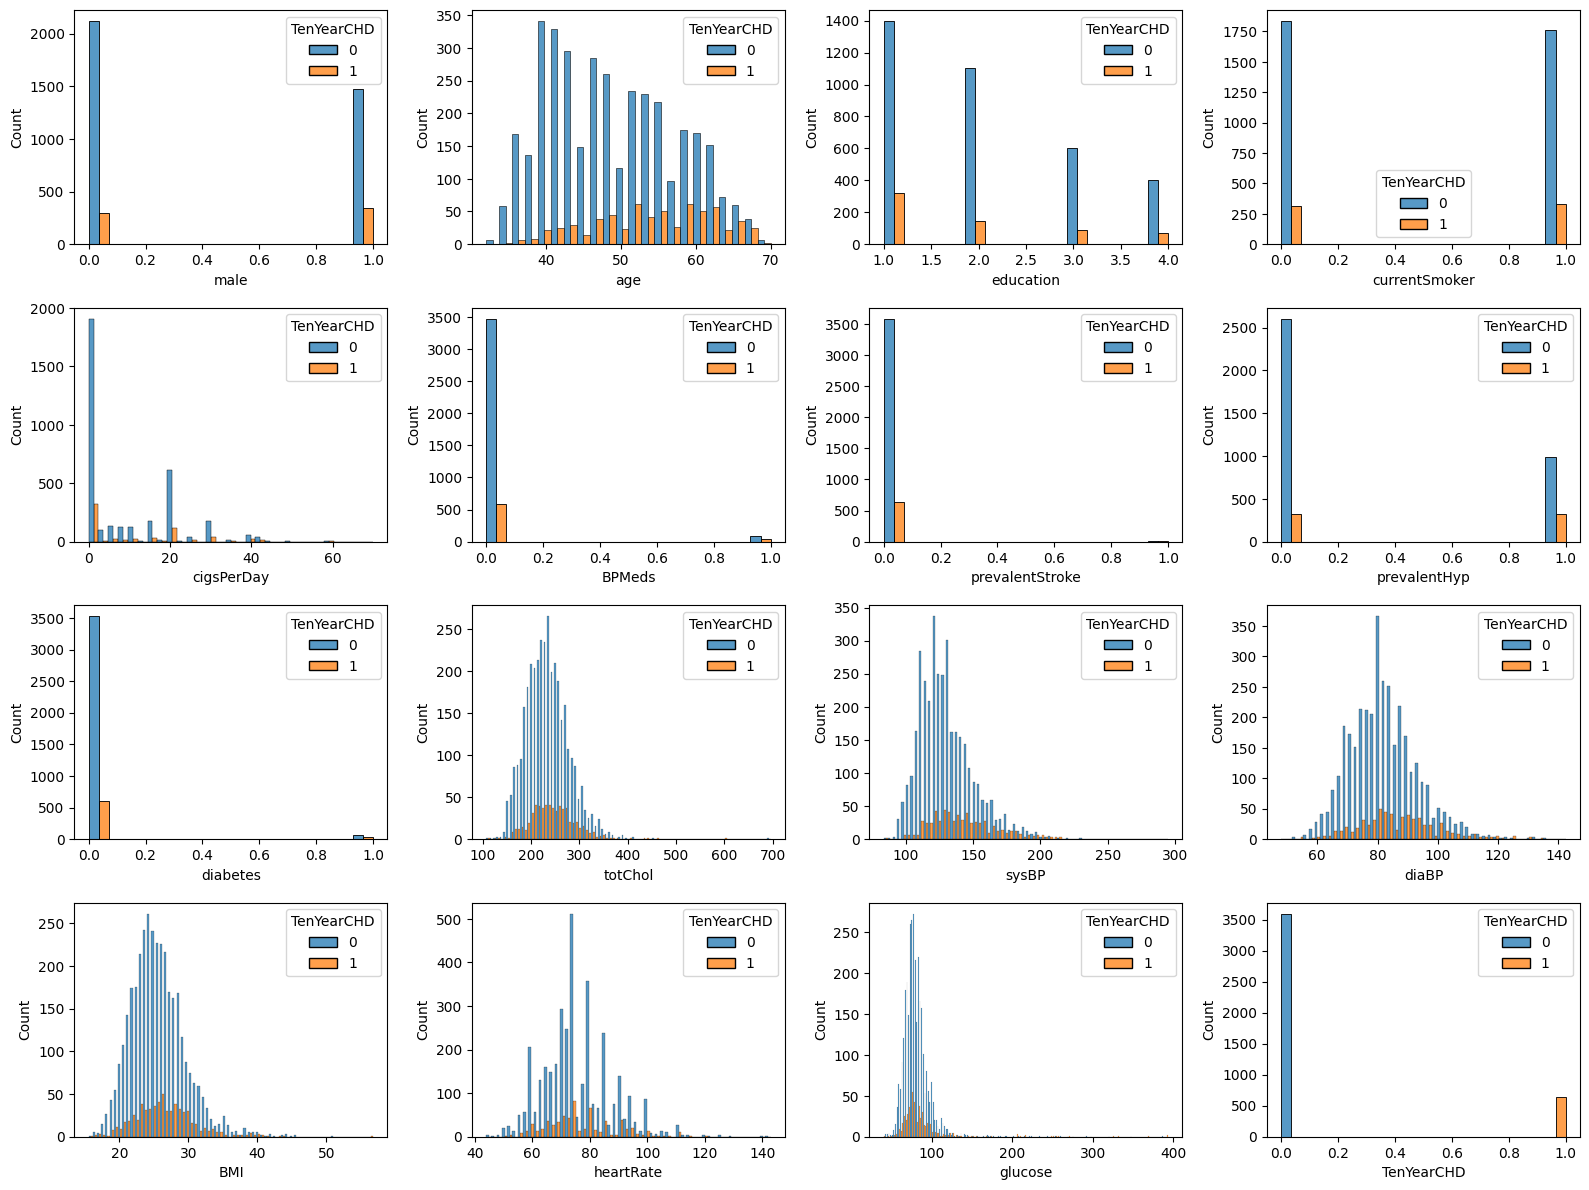

In [9]:
num_cols = 4
num_rows = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 12))
for i, col in enumerate(df.columns):
    row = i // num_cols
    col_num = i % num_cols
    kde=df[col].nunique()>4
    sns.histplot(df,x=df[col],hue="TenYearCHD",ax=axes[row, col_num],multiple='dodge')

plt.tight_layout()
plt.show()

**văn bản in đậm**

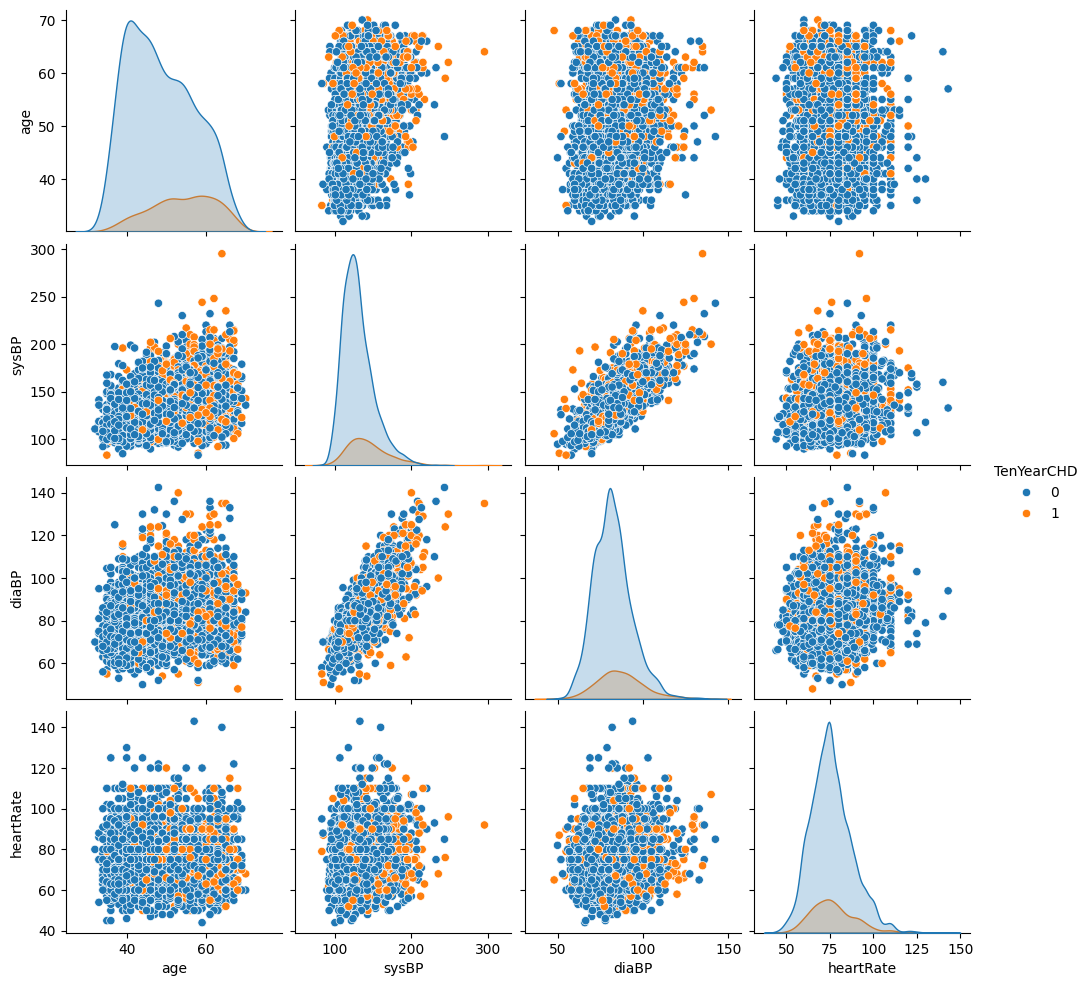

In [10]:
bp=df[['age','sysBP','diaBP','heartRate','TenYearCHD']]
sns.pairplot(bp,hue='TenYearCHD')
plt.show()

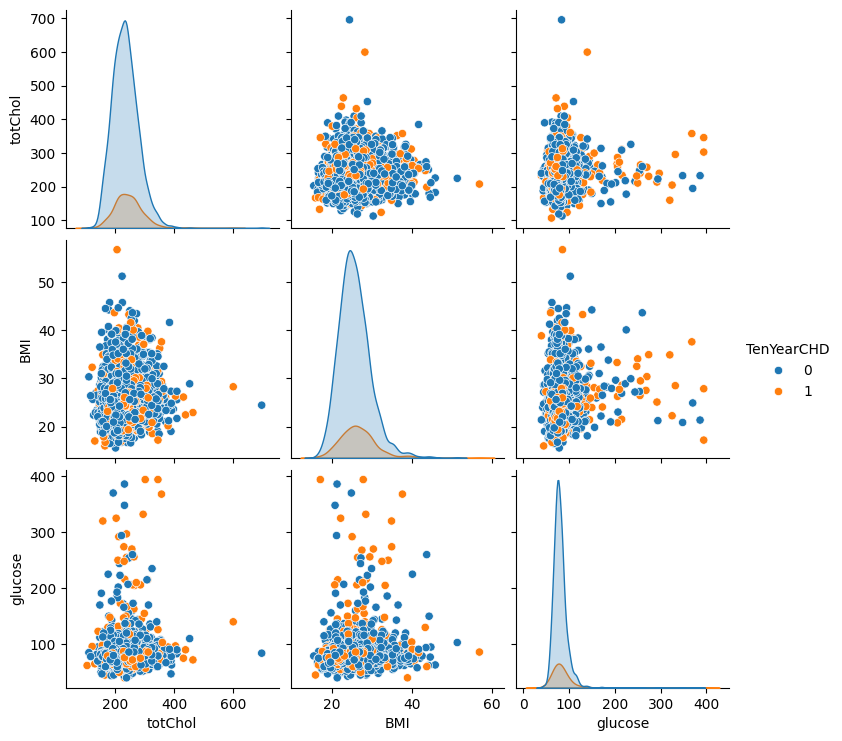

In [11]:
chol=df[['totChol','BMI','glucose','TenYearCHD']]
sns.pairplot(chol,hue='TenYearCHD')
plt.show()

<a id="7"></a>
# Tiền xử lý dữ liệu

**Feature Selection**

Biểu đồ tương quan

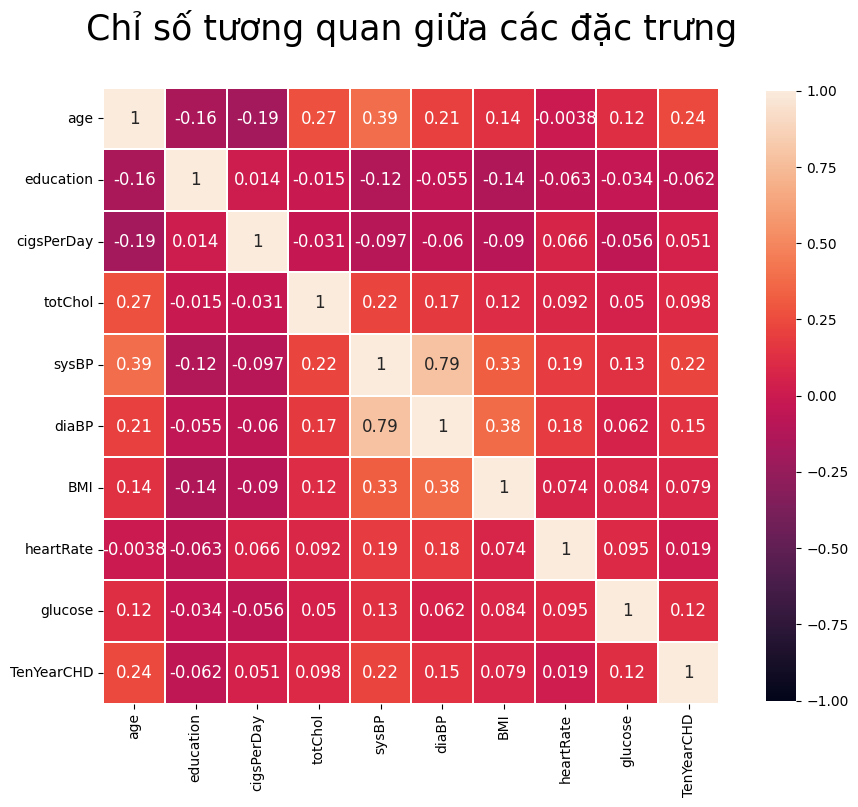

In [12]:
plt.subplots(figsize=(12, 8))
num = df[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]
num.dropna(inplace=True)
p = sns.heatmap(num.corr(), square=True, cbar_kws=dict(shrink =.99), 
                annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))

p.axes.set_title("Chỉ số tương quan giữa các đặc trưng\n", fontsize=25)
plt.show()

Dựa vào biểu đồ trên, ta nhận thấy được rằng đặc trưng 'TenYearCHD' bị ảnh hưởng tuyến tính chủ yếu bởi 6 yếu tố:
- age: độ tuổi
- prevalentHyp: tiền sử tăng huyết áp
- sysBP, diaBP: Huyết áp tâm thu, huyết áp tâm trương
- glucose: lượng đường trong máu

Vậy còn các đặc trưng categorical thì sao, vì giá trị ít hơn rất nhiều nên tương quan tuyến tính của chúng sẽ rất thấp. Ta cần một cách tiếp cận khác phù hợp hơn là thuật toán trích chọn chi2

In [13]:
from sklearn.feature_selection import SelectKBest, chi2
df_cat=df[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']]
df_cat.dropna(inplace=True)
X=df_cat.drop('TenYearCHD',axis=1)
chi_scores = chi2(X, df_cat['TenYearCHD'])

<Axes: >

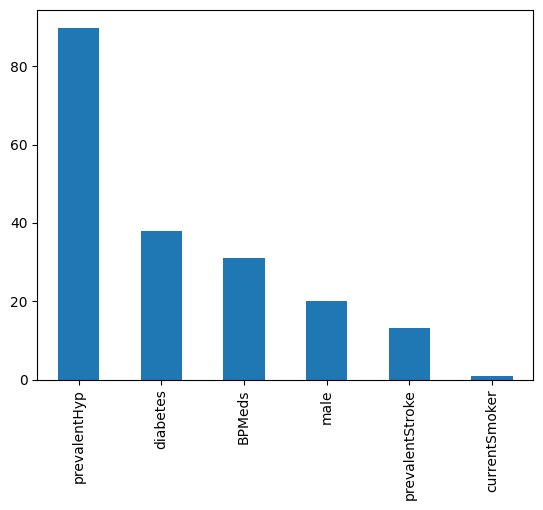

In [14]:
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

prevalentHyp là đặc trưng có ảnh hưởng vượt trội so với các đặc trưng còn lại trong nhóm. Điều này có thể giải thích là vì các đặc trưng còn lại có phân bố không đều (giá trị 1 cực kì ít so với 'prevalentHyp') nên không đủ để hình thành ảnh hưởng

Ví dụ như bên dưới: Những người có lượng đường cao chắc chắn 90% sẽ bị tiểu đường. Tuy nhiên những người bị tiểu đường đó phần lớn không mắc bệnh CHD

<Axes: xlabel='glucose', ylabel='Count'>

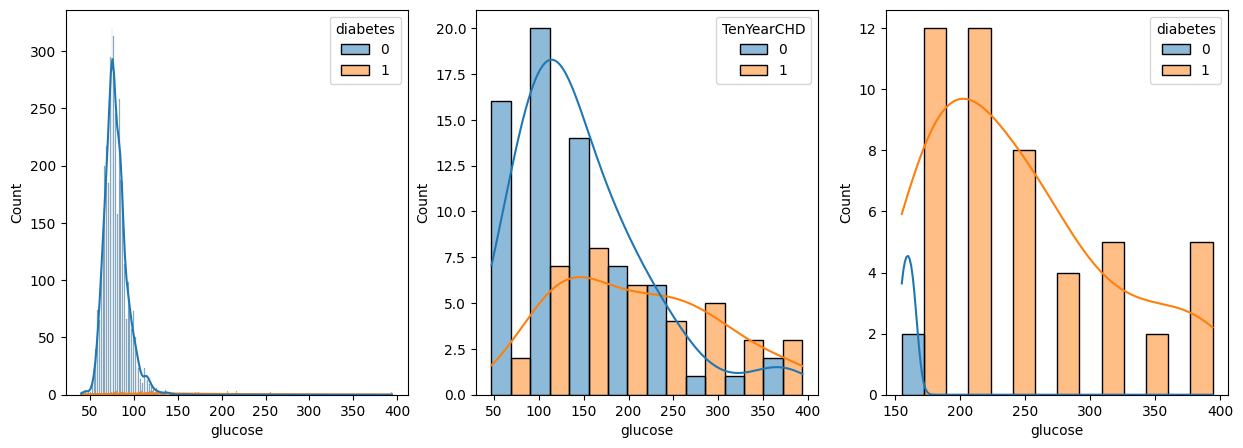

In [15]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
fig.set_size_inches(15,5)
sns.histplot(df,x='glucose',hue='diabetes',ax=ax1,kde=True,multiple='dodge')
sns.histplot(df[df['diabetes']==1],x='glucose',hue='TenYearCHD',ax=ax2,kde=True,multiple='dodge')
sns.histplot(df[df['glucose']>150],x='glucose',hue='diabetes',ax=ax3,kde=True,multiple='dodge')

Một số đặc trưng là không ảnh hưởng đủ lớn hoặc thừa thãi (VD: cigsPerDay > 0 <=> currentSmoker =1).

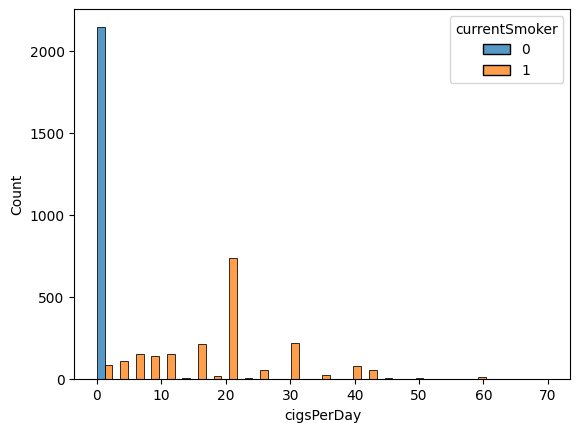

In [16]:
sns.histplot(df, x='cigsPerDay', hue='currentSmoker',multiple='dodge')
plt.show()

In [17]:
data=df[['age','prevalentHyp','sysBP','diaBP','glucose','TenYearCHD']]
outlier=((data['glucose']>200)|(data['sysBP']>200)|(data['diaBP']>150))
data=data[~outlier]
data.shape

(4171, 6)

**Xử lý NaN**

- Như đề cập ở trên, dataset hiện đang thiếu khoảng 600 giá trị, chủ yếu nằm ở cột "glucose" (~10% lượng thông tin của đặc trưng).
Khi điền dữ liệu vào các ô đó ta cần đảm bảo sự phân phối dữ liệu và các mối tương quan giữa các cột không bị xê dịch nhiều

=> Các phép điền giá trị trung bình, trung vị, mốt sẽ dễ làm thay đổi điều đó

- Ta sẽ tiếp cận bằng một phương thức khác là hàm KNNImputer() được dựa trên thuật toán KNN, điền dữ liệu bị thiếu của 1 điểm dựa vào đặc trưng tương ứng của các điểm lân cận nó

In [18]:
#chia tách dữ liệu trước khi impute để tránh rỏ rĩ dữ liệu
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop("TenYearCHD",axis=1),data["TenYearCHD"],test_size=0.2,random_state=42,stratify=data["TenYearCHD"])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3336, 5), (3336,), (835, 5), (835,))

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline


preprocessing = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

x_train_processed = preprocessing.fit_transform(x_train)
x_test_processed = preprocessing.transform(x_test)

x_train_processed=pd.DataFrame(x_train_processed,columns=x_train.columns)
x_test_processed=pd.DataFrame(x_test_processed,columns=x_test.columns)
print(x_train_processed.shape)
print(x_test_processed.shape)
x_train_processed.head()

(3336, 5)
(835, 5)


,age,prevalentHyp,sysBP,diaBP,glucose
0,0.536359,-0.662700,-0.072600,0.212072,0.322379
1,0.184643,1.508978,1.514187,1.867795,-1.051111
2,0.770835,-0.662700,-0.438781,0.212072,1.352497
3,0.301882,-0.662700,-1.634974,-1.530794,-0.295692
4,1.474266,1.508978,0.586527,0.647789,0.185030


**Resampling**

- Những người có nguy cơ mắc CHD là ít hơn nhiều với người không bị (~1:6) nên ta phải ứng phó với vấn đề mất cân bằng dữ liệu
- Ta sử dụng thuật toán SMOTE để oversampling nhãn miniority, với hàm cụ thể ở đây là biến thể SMOTENC, hỗ trợ cả đặc trưng categorical và numerical

In [20]:
from imblearn.over_sampling import SMOTENC
smt=SMOTENC(categorical_features=['prevalentHyp'],sampling_strategy=0.8, random_state=42)
x_train_processed,y_train=smt.fit_resample(x_train_processed,y_train)

In [21]:
x_train_processed.shape, y_train.shape, x_test_processed.shape, y_test.shape

((5131, 5), (5131,), (835, 5), (835,))

In [22]:
y_train.value_counts()

TenYearCHD
0    2851
1    2280
Name: count, dtype: int64

#Áp dụng các mô hình học máy

Ta áp dụng các thuật toán phân loại như Logistic Regression, Naive Bayes, Support Vector Machine, Decision Tree và Gradient Boosting.
Mặt khác, để phù hợp với mục tiêu của mô hình (cảnh báo bệnh) ta sẽ hạ ngưỡng xác suất (mặc định 0.5) xuống còn 0.35 để tăng recall lên

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

model=[LogisticRegression(C= 0.01),
       BernoulliNB(alpha=0.1),
       SVC(C=0.1,gamma=0.01,degree=3,class_weight='balanced',probability=True),
       DecisionTreeClassifier(criterion='entropy', splitter= 'random',class_weight='balanced',max_depth=20),
       RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=10,class_weight='balanced'),
       XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=-1),]
model_name=["Logistic Regression","Bernoulli Naive Bayes","Support Vector Machine","Decision Tree","Random Forest","XGBoost"]
model_performance=[]
for i in range(len(model)):
    model[i].fit(x_train_processed,y_train)
    y_pred=(model[i].predict_proba(x_test_processed)[:,1]>=0.35).astype(int)
    acc=round(accuracy_score(y_test,y_pred)*100,ndigits=2)
    recall=round(recall_score(y_test,y_pred)*100,ndigits=2)
    precision=round(precision_score(y_test,y_pred)*100,ndigits=2)
    scores=[acc,recall,precision]
    model_performance.append(scores)
model_performance=pd.DataFrame(model_performance,columns=["Accuracy","Recall","Precision"],index=model_name)
model_performance

,Accuracy,Recall,Precision
Logistic Regression,51.74,86.78,21.34
Bernoulli Naive Bayes,59.76,67.77,21.64
Support Vector Machine,52.22,85.12,21.28
Decision Tree,66.83,23.97,13.55
Random Forest,52.69,70.25,19.14
XGBoost,75.57,27.27,22.15


**Kết luận** Độ chính xác của Accuracy và Recall tỉ lệ nghịch với nhau, không thể đạt được cả 2 cùng 1 lúc. Đa số các mô hình có chỉ số Recall cao tuy nhiên precision đều dao động ở mức 20% (nhiều cảnh báo giả)

#Cách mô hình đưa ra lựa chọn

- Ta sẽ khai phá 'nội bộ' mô hình dự đoán để xem cách chúng đưa ra lựa chọn đối với mỗi trường hợp. Ở đây ta sẽ dùng thư viện SHAP và thuật toán đại diện là Logistic Regression
- Cụ thể SHAP sẽ đưa ra trọng số thuật toán của từng đặc trưng trong điểm dữ liệu được chọn đó. Ta sẽ dựa vào độ lớn, chiều của trọng số để phán đoán rằng đặc trưng nào có sự ảnh hưởng lớn nhất trong từng trường hợp cụ thể

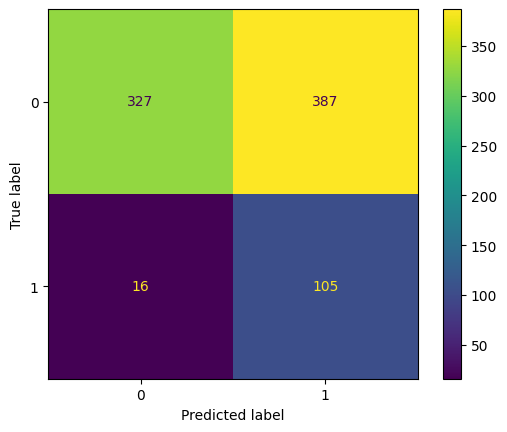

              precision    recall  f1-score   support

           0       0.95      0.46      0.62       714
           1       0.21      0.87      0.34       121

    accuracy                           0.52       835
   macro avg       0.58      0.66      0.48       835
weighted avg       0.85      0.52      0.58       835



In [25]:
lr=LogisticRegression(C= 0.01)
lr.fit(x_train_processed,y_train)
y_pred=(lr.predict_proba(x_test_processed)[:,1]>=0.35).astype(int)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()
print(classification_report(y_test,y_pred))

Ta chia nhóm test thành 4 nhóm nhỏ ứng với 4 trạng thái dự đoán: True Positive (tp), True Negative (tn), False Postive (fp) và False Negative (fn)

In [26]:
tp_id=[i for i in range (y_pred.shape[0]) if y_pred[i] == 1 and y_test.iloc[i]==1]
tp=x_test_processed.iloc[tp_id]
tn_id=[i for i in range (y_pred.shape[0]) if y_pred[i] == 0 and y_test.iloc[i]==0]
tn=x_test_processed.iloc[tn_id]
fp_id=[i for i in range (y_pred.shape[0]) if y_pred[i] == 1 and y_test.iloc[i]==0]
fp=x_test_processed.iloc[fp_id]
fn_id=[i for i in range (y_pred.shape[0]) if y_pred[i] == 0 and y_test.iloc[i]==1]
fn=x_test_processed.iloc[fn_id]

In [27]:
fp.shape[0]

387

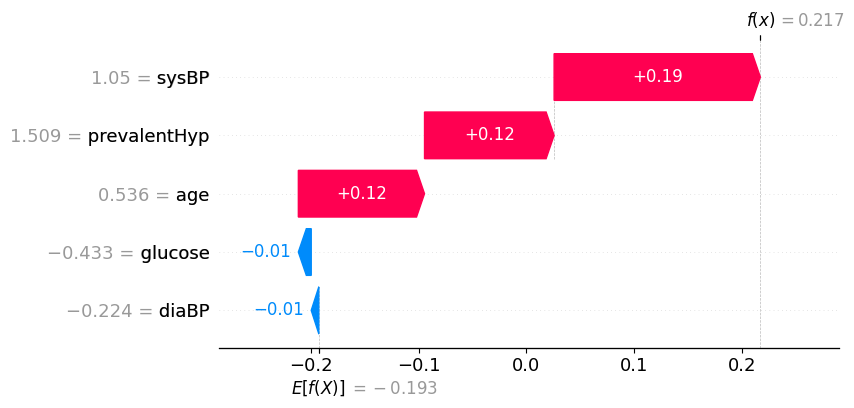

In [28]:
import shap
from random import randint
explain=shap.Explainer(model[0],x_train_processed)
shap_values=explain(x_test_processed)
id=fp.index[randint(0,fp.shape[0]-1)]
shap.plots.waterfall(shap_values[id])

#Tổng kết
**Đánh giá mô hình**

- Các mô hình đều tuân theo quy luật tỉ lệ nghịch giữa chỉ số Accuracy và Recall

- Đặc biệt Precision của tất cả mô hình đều rất thấp.

- Dựa vào mục tiêu hướng tới thì mô hình có tiềm năng phù hợp cao nhất là thuật toán Logistic Regression, Naive Bayes, Random Forest và Support Vector Machine


